<a href="https://colab.research.google.com/github/1906142/prolog/blob/main/Klasifikasi_Ukuran_Baju_1906142.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Begin


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from google.colab import drive
drive.mount('TB_KEcerdasan_buatan')

Mounted at TB_KEcerdasan_buatan


In [24]:
data_df = pd.read_csv('/content/TB_KEcerdasan_buatan/MyDrive/TB_KEcerdasan_buatan/Dataaset.csv')
data_df.head()

,Tinggi Badan,Berat Badan,Ukuran Baju
0,150,45,s
1,150,55,s
2,150,59,s
3,150,63,m
4,155,45,s


In [25]:
data_df.shape

(53, 3)

data memiliki 42 baris dan 3 kolom

In [26]:
data_df.describe()

,Tinggi Badan,Berat Badan
count,53.000000,53.000000
mean,170.377358,60.716981
std,12.562500,7.001037
min,150.000000,45.000000
25%,162.000000,55.000000
50%,170.000000,59.000000
75%,180.000000,68.000000
max,192.000000,77.000000


In [27]:
data_df.keys()

Index(['Tinggi Badan', 'Berat Badan', 'Ukuran Baju'], dtype='object')

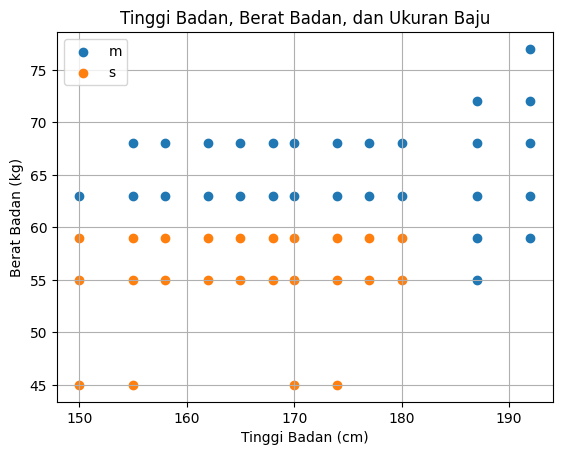

In [28]:
fig, ax = plt.subplots()

for jk, d in data_df.groupby('Ukuran Baju'):
    ax.scatter(d['Tinggi Badan'], d['Berat Badan'], label=jk)

plt.legend(loc='upper left')
plt.title('Tinggi Badan, Berat Badan, dan Ukuran Baju')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

kode tersebut akan menghasilkan scatter plot dengan titik-titik yang merepresentasikan tinggi dan berat untuk setiap Ukuran Baju yang ada dalam DataFrame

In [29]:
X = np.array(data_df[['Tinggi Badan', 'Berat Badan']])
y = np.array(data_df['Ukuran Baju'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y ,random_state=1)

print(f'X_train :\n{X_train.shape}\nX_test : {X_test.shape}\nX : {X.shape}')
print(f'y_train : {y_train.shape}\ny_test : {y_test.shape}\ny : {y.shape}\n')
print(f'features :\n{X_train}\n')
print(f'labels :\n{y_train}')

X_train :
(47, 2)
X_test : (6, 2)
X : (53, 2)
y_train : (47,)
y_test : (6,)
y : (53,)

features :
[[155  45]
 [177  68]
 [150  63]
 [180  63]
 [155  68]
 [174  59]
 [187  63]
 [192  68]
 [150  55]
 [180  59]
 [158  55]
 [168  55]
 [162  68]
 [177  59]
 [158  68]
 [150  59]
 [162  55]
 [180  55]
 [168  59]
 [187  55]
 [165  55]
 [170  55]
 [177  55]
 [187  68]
 [192  77]
 [187  72]
 [155  59]
 [170  59]
 [174  45]
 [192  72]
 [180  68]
 [165  59]
 [165  68]
 [158  59]
 [174  68]
 [174  63]
 [155  63]
 [165  63]
 [170  45]
 [192  59]
 [168  63]
 [192  63]
 [150  45]
 [177  63]
 [158  63]
 [187  59]
 [168  68]]

labels :
['s' 'm' 'm' 'm' 'm' 's' 'm' 'm' 's' 's' 's' 's' 'm' 's' 'm' 's' 's' 's'
 's' 'm' 's' 's' 's' 'm' 'm' 'm' 's' 's' 's' 'm' 'm' 's' 'm' 's' 'm' 'm'
 'm' 'm' 's' 'm' 'm' 'm' 's' 'm' 'm' 'm' 'm']


kode tersebut akan membagi data menjadi data latih dan data uji dengan proporsi tertentu,

In [30]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train :\n{y_train}')

y_train :
[[1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]


In [31]:
y_train = y_train.flatten()
print(f'y_train : {y_train}')

y_train : [1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 0]


In [32]:
y_test = lb.fit_transform(y_test)
print(f'y_train : {y_test}')

y_train : [[1]
 [0]
 [0]
 [0]
 [1]
 [1]]


In [ ]:
y_test = y_test.flatten()
print(f'y_test : {y_test}')

y_test : [0 1 0 1 1]


In [33]:
model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
model.fit(X_train, y_train)

KNeighborsClassifier()

model

In [34]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1])

digunakan untuk melakukan prediksi pada data dengan model kkn


In [35]:
cls_report = classification_report(y_test, y_pred)

print(f'Classification Report :\n{cls_report}')

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [37]:
input_data = (180, 70) # masukan tinggi dan berat badan anda disini

# Mengubah tipe data menjadi array numpy
change_input = np.asarray(input_data)

# Reshape the numpy array as we are predicting for one instance
reshape_array = change_input.reshape(1, -1)

prediction = model.predict(reshape_array)
print(prediction)

if(prediction == [0]):
    print('Ukuran baju adalah M')
else:
    print('Ukuran baju adalah S')

[0]
Ukuran baju adalah s
